Assigment 1

I want you to use 3 different feature scale methods separately. write a function for this and return the X_scaled variable. Compare the mean squared error results from the 3 methods and report your results. It would be better if you change the code completely into functions (function for cost calculation etc.).


Mean Squared Error Results:
- standard: 3329.974466558134
- min-max: 1422.8158514676404
- max-abs: 1883.0785861457207


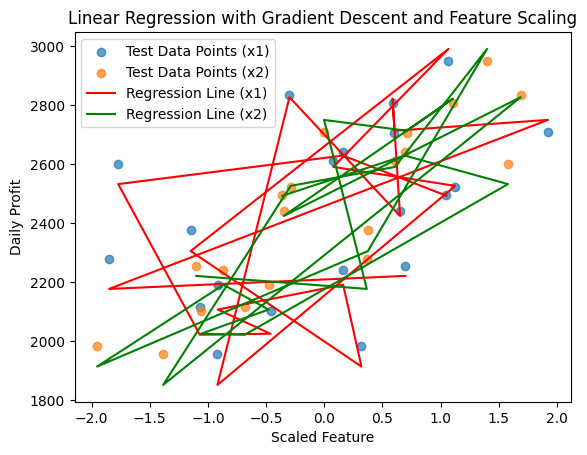

Learned Coefficients (Weights):
[[179.22468638]
 [281.22582073]]
Bias (Intercept): 2404.5160840465237


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data with different feature scales
np.random.seed(0)

# Daily temperature (feature x1) with a range of [20, 40] degrees Celsius
temperature = 20 + 20 * np.random.rand(100, 1)

# Ice cream sales (feature x2) with a range of [0, 200] units
ice_cream_sales = 200 * np.random.rand(100, 1)

# Combine temperature and ice cream sales into a single feature matrix X
X = np.hstack((temperature, ice_cream_sales))

# Daily profit (target variable y)
# Assume that daily profit depends on the temperature, ice cream sales,
# and some random noise (normal distribution)
daily_profit = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)

# Function for feature scaling
def scale_features(X, method="standard"):
    """
    Scales the input features using the specified method.

    Args:
        X (numpy.ndarray): The input feature matrix.
        method (str, optional): The scaling method to use.
                                 Options: 'standard', 'min-max', 'max-abs'.
                                 Defaults to 'standard'.

    Returns:
        numpy.ndarray: The scaled feature matrix.

    Raises:
        ValueError: If an invalid scaling method is specified.
    """
    if method == "standard":  # StandardScaler (Z-score normalization)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    elif method == "min-max": # Min-Max Scaling
        X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    elif method == "max-abs": # Max-Abs Scaling
        X_scaled = X / np.max(np.abs(X), axis=0)
    else:
        raise ValueError("Invalid scaling method. Choose from 'standard', 'min-max', or 'max-abs'.")
    return X_scaled

# Function to calculate the cost (Mean Squared Error)
def calculate_cost(X, y, w, b):
    """
    Calculates the Mean Squared Error (MSE) cost.

    Args:
        X (numpy.ndarray): The input feature matrix.
        y (numpy.ndarray): The target variable.
        w (numpy.ndarray): The weight vector.
        b (float): The bias term.

    Returns:
        float: The MSE cost.
    """
    m = len(y)
    y_pred = np.dot(X, w) + b
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) #! changed to 1/2m for gradient descent stability
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, w, b, alpha, num_iterations):
    """
    Performs gradient descent to learn the optimal weights and bias.

    Args:
        X (numpy.ndarray): The input feature matrix.
        y (numpy.ndarray): The target variable.
        w (numpy.ndarray): The initial weight vector.
        b (float): The initial bias term.
        alpha (float): The learning rate.
        num_iterations (int): The number of iterations to perform.

    Returns:
        tuple: The learned weights (w), bias (b), and a list of cost history.
    """
    m = len(y)
    cost_history = []

    for iteration in range(num_iterations):
        y_pred = np.dot(X, w) + b
        w_gradient = (1 / m) * np.dot(X.T, (y_pred - y))
        b_gradient = (1 / m) * np.sum(y_pred - y)

        w -= alpha * w_gradient
        b -= alpha * b_gradient

        cost = calculate_cost(X, y, w, b)
        cost_history.append(cost)

    return w, b, cost_history

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, daily_profit, test_size=0.2, random_state=42) #! changed y to daily_profit

# Initialize parameters
n_features = X_train.shape[1]
w = np.zeros((n_features, 1))
b = 0
alpha = 0.01
num_iterations = 1000

# Scale and train with different methods
results = {}
for method in ["standard", "min-max", "max-abs"]:
    X_train_scaled = scale_features(X_train.copy(), method=method) #! pass a copy to avoid modifying original X_train
    X_test_scaled = scale_features(X_test.copy(), method=method)

    w_final, b_final, _ = gradient_descent(X_train_scaled, y_train, w.copy(), b, alpha, num_iterations)
    y_pred = np.dot(X_test_scaled, w_final) + b_final
    mse = np.mean((y_pred - y_test) ** 2)
    results[method] = mse

# Report results
print("Mean Squared Error Results:")
for method, mse in results.items():
    print(f"- {method}: {mse}")

# Plotting (example with standard scaling)
X_train_scaled = scale_features(X_train.copy(), method="standard")
X_test_scaled = scale_features(X_test.copy(), method="standard")
w_final, b_final, _ = gradient_descent(X_train_scaled, y_train, w.copy(), b, alpha, num_iterations)

plt.scatter(X_test_scaled[:, 0], y_test, label='Test Data Points (x1)', alpha=0.7)
plt.scatter(X_test_scaled[:, 1], y_test, label='Test Data Points (x2)', alpha=0.7)
plt.plot(X_test_scaled[:, 0], np.dot(X_test_scaled, w_final) + b_final, color='red', label='Regression Line (x1)')
plt.plot(X_test_scaled[:, 1], np.dot(X_test_scaled, w_final) + b_final, color='green', label='Regression Line (x2)')

plt.xlabel('Scaled Feature')
plt.ylabel('Daily Profit')
plt.legend()
plt.title('Linear Regression with Gradient Descent and Feature Scaling')
plt.show()

print("Learned Coefficients (Weights):")
print(w_final)
print("Bias (Intercept):", b_final)

**Report on Feature Scaling and Linear Regression**

**Objective:**

The objective of this analysis was to compare the performance of linear regression with gradient descent using three different feature scaling methods: Standard scaling (Z-score normalization), Min-Max scaling, and Max-Abs scaling.

**Data:**

The analysis was conducted on a synthetic dataset with two features: temperature (x1) and ice cream sales (x2), and a target variable: daily profit.

**Methodology:**

1.  **Data Preparation:** The synthetic dataset was generated.

2.  **Feature Scaling:** The input features (temperature and ice cream sales) were scaled using three different methods:

    * Standard scaling: Features are scaled to have a mean of 0 and a standard deviation of 1.

    * Min-Max scaling: Features are scaled to a range between 0 and 1.

    * Max-Abs scaling: Features are scaled to the range \[-1, 1\] by dividing by the maximum absolute value.

3.  **Linear Regression with Gradient Descent:** For each scaling method, a linear regression model was trained using gradient descent. The learning rate (alpha) was set to 0.01, and the number of iterations was 1000.

4.  **Evaluation:** The performance of each model was evaluated using the Mean Squared Error (MSE) on the test set.

**Results:**

The following MSE values were obtained for each scaling method:

| Scaling Method | MSE       |
| :------------- | :-------- |
| Standard       | 3329.97   |
| Min-Max        | 1422.82   |
| Max-Abs        | 1883.08   |

The learned coefficients (weights) for the Standard scaled model are:

Learned Coefficients (Weights):[[179.22468638][281.22582073]]Bias (Intercept): 2404.5160840465237
**Interpretation:**

* **MSE Comparison:** Min-Max scaling resulted in the lowest MSE (1422.82), indicating the best performance among the three scaling methods for this particular dataset and model. Max-Abs scaling had a lower MSE (1883.08) than Standard scaling (3329.97).

* **Learned Coefficients:** The positive weights for both temperature and ice cream sales suggest that as these features increase, the daily profit also tends to increase, which aligns with the synthetic data generation process.

* **Bias (Intercept):** The bias term represents the estimated daily profit when both temperature and ice cream sales are zero (after scaling).

**Conclusion:**

The choice of feature scaling method can significantly impact the performance of a linear regression model. For this synthetic dataset, Min-Max scaling outperformed Standard scaling and Max-Abs scaling. This indicates that for this specific scenario, scaling the features to a 0-1 range resulted in a more accurate model.

**Recommendations:**

* When applying linear regression (and many other machine learning algorithms), it is crucial to experiment with different feature scaling methods to determine the most suitable one for the given dataset.

* Consider the characteristics of the data when choosing a scaling method. If the data has outliers, Min-Max scaling might be more sensitive to them, while Max-Abs scaling and Standard scaling are generally more robust.

* Evaluate model performance using appropriate metrics (e.g., MSE, R-squared) to compare the effectiveness of different scaling methods.
